In [97]:
import requests
import json
import numpy as np
import pandas as pd
from pandas import json_normalize

<AxesSubplot:>

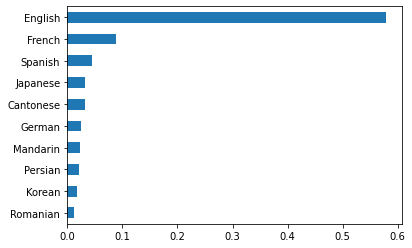

In [3]:
original_lang = pd.read_csv('bbc_movie_lang.csv')
original_lang.dominant_lang.value_counts(normalize = True).head(10).sort_values().plot(kind = 'barh')

In [9]:
original_lang

,movie,director,m_year,crit_rank,critic,crit_org,crit_cn,link,dominant_lang
0,Mulholland Drive,David Lynch,2001,1,Simon Abrams,Freelance film critic,US,/title/tt0166924/,English
1,In the Mood for Love,Wong Kar-wai,2000,2,Simon Abrams,Freelance film critic,US,/title/tt0118694/,Cantonese
2,The Tree of Life,Terrence Malick,2011,3,Simon Abrams,Freelance film critic,US,/title/tt0478304/,English
3,Yi Yi: A One and a Two,Edward Yang,2000,4,Simon Abrams,Freelance film critic,US,/title/tt0244316/,Mandarin
4,Goodbye to Language,Jean-Luc Godard,2014,5,Simon Abrams,Freelance film critic,US,/title/tt2400275/,French
...,...,...,...,...,...,...,...,...,...
1765,The Lives of Others,Florian Henckel von Donnersmarck,2006,6,Raymond Zhou,China Daily,China,/title/tt0405094/,German
1766,Still Life,Jia Zhangke,2006,7,Raymond Zhou,China Daily,China,/title/tt2395417/,English
1767,Birdman,Alejandro González Iñárritu,2014,8,Raymond Zhou,China Daily,China,/title/tt2562232/,English
1768,Infernal Affairs,Andrew Lau and Alan Mak,2002,9,Raymond Zhou,China Daily,China,/title/tt0338564/,Cantonese


In [81]:
original_lang.groupby('crit_cn').dominant_lang.value_counts(normalize = True)*100


crit_cn    dominant_lang
Argentina  English          55.000000
           Japanese         10.000000
           Spanish          10.000000
           Cantonese         5.000000
           French            5.000000
                              ...    
US         Danish            0.123305
           Greek             0.123305
           Malay             0.123305
           Maya              0.123305
           Nepali            0.123305
Name: dominant_lang, Length: 340, dtype: float64

In [152]:
crit_cn_list = original_lang.crit_cn.unique().tolist()
crit_cn_list

['US',
 'Mexico',
 'UK',
 'Italy',
 'Turkey',
 'Brazil',
 'Canada',
 'Argentina',
 'France',
 'Germany',
 'India',
 'Israel',
 'Australia',
 'Cuba',
 'Colombia',
 'Senegal',
 'South Korea',
 'Philippines',
 'Belgium',
 'Egypt',
 'Chile',
 'Lebanon',
 'Japan',
 'South Africa',
 'Austria',
 'Kazakhstan',
 'UAE',
 'Hong Kong',
 'Namibia',
 'Singapore',
 'Switzerland',
 'Bangladesh',
 'Indonesia',
 'Taiwan',
 'Qatar',
 'China']

In [159]:
for cn in crit_cn_list:
    xx = original_lang[original_lang.crit_cn == cn].dominant_lang.value_counts(normalize =True).head(1)
    print(cn, xx)

US English    0.713933
Name: dominant_lang, dtype: float64
Mexico English    0.5
Name: dominant_lang, dtype: float64
UK English    0.581006
Name: dominant_lang, dtype: float64
Italy English    0.282051
Name: dominant_lang, dtype: float64
Turkey English    0.4
Name: dominant_lang, dtype: float64
Brazil English    0.8
Name: dominant_lang, dtype: float64
Canada English    0.6
Name: dominant_lang, dtype: float64
Argentina English    0.55
Name: dominant_lang, dtype: float64
France English    0.44
Name: dominant_lang, dtype: float64
Germany English    0.5
Name: dominant_lang, dtype: float64
India English    0.32
Name: dominant_lang, dtype: float64
Israel English    0.425
Name: dominant_lang, dtype: float64
Australia English    0.45
Name: dominant_lang, dtype: float64
Cuba English    0.285714
Name: dominant_lang, dtype: float64
Colombia English    0.4
Name: dominant_lang, dtype: float64
Senegal English    0.5
Name: dominant_lang, dtype: float64
South Korea English    0.7
Name: dominant_lang, 

In [243]:
df_new = pd.DataFrame(original_lang.groupby('crit_cn').dominant_lang.value_counts(normalize = True)*100)
df_new

dominant_lang
crit_cn   dominant_lang               
Argentina English            55.000000
          Japanese           10.000000
          Spanish            10.000000
          Cantonese           5.000000
          French              5.000000
...                                ...
US        Danish              0.123305
          Greek               0.123305
          Malay               0.123305
          Maya                0.123305
          Nepali              0.123305

[340 rows x 1 columns]

In [108]:
df_new2 = df_new.unstack()
df_new2

dominant_lang                                            \
dominant_lang        Arabic    Bambara  Cantonese   Catalan   Chinese   
crit_cn                                                                 
Argentina               NaN        NaN   5.000000       NaN       NaN   
Australia               NaN        NaN   5.000000       NaN       NaN   
Austria                 NaN        NaN        NaN       NaN       NaN   
Bangladesh              NaN        NaN  10.000000       NaN       NaN   
Belgium                 NaN        NaN  10.000000       NaN       NaN   
Brazil                  NaN        NaN        NaN       NaN       NaN   
Canada                  NaN        NaN   4.000000       NaN       NaN   
Chile                   NaN        NaN        NaN       NaN       NaN   
China                   NaN        NaN  10.000000       NaN       NaN   
Colombia                NaN        NaN   2.500000       NaN       NaN   
Cuba                    NaN        NaN   6.122449       NaN       NaN   
Egypt             10.000000        NaN        NaN       NaN       NaN   
France                  NaN        NaN   2.000000       NaN       NaN   
Germany                 NaN        NaN   6.250000  2.083333       NaN   
Hong Kong               NaN        NaN  10.000000       NaN       NaN   
India                   NaN        NaN   8.000000       NaN       NaN   
Indonesia               NaN        NaN        NaN       NaN       NaN   
Israel                  NaN   2.500000   2.500000       NaN  2.500000   
Italy              7.692308        NaN        NaN       NaN       NaN   
Japan                   NaN        NaN        NaN       NaN       NaN   
Kazakhstan              NaN        NaN        NaN       NaN       NaN   
Lebanon           10.344828        NaN   3.448276       NaN       NaN   
Mexico                  NaN        NaN   5.000000       NaN       NaN   
Namibia           10.000000  10.000000        NaN       NaN       NaN   
Philippines             NaN        NaN        NaN       NaN       NaN   
Qatar                   NaN        NaN  10.000000       NaN       NaN   
Senegal                 NaN        NaN        NaN       NaN       NaN   
Singapore               NaN        NaN   5.000000       NaN       NaN   
South Africa            NaN        NaN        NaN       NaN       NaN   
South Korea             NaN        NaN   5.000000       NaN       NaN   
Switzerland             NaN        NaN        NaN       NaN       NaN   
Taiwan                  NaN        NaN  10.000000       NaN       NaN   
Turkey                  NaN        NaN  10.000000       NaN       NaN   
UAE                3.333333        NaN        NaN       NaN       NaN   
UK                      NaN   1.117318   2.234637       NaN       NaN   
US                 0.369914   0.123305   2.712700       NaN  0.863132   

                                                                 ...  \
dominant_lang     Czech    Danish    English   Filipino Finnish  ...   
crit_cn                                                          ...   
Argentina           NaN       NaN  55.000000        NaN     NaN  ...   
Australia           NaN       NaN  45.000000        NaN     2.5  ...   
Austria             NaN       NaN  35.000000        NaN     NaN  ...   
Bangladesh          NaN       NaN  30.000000        NaN     NaN  ...   
Belgium             NaN       NaN  30.000000        NaN     NaN  ...   
Brazil              NaN       NaN  80.000000        NaN     NaN  ...   
Canada              NaN       NaN  60.000000        NaN     NaN  ...   
Chile               NaN       NaN  70.000000        NaN     NaN  ...   
China               NaN       NaN  40.000000        NaN     NaN  ...   
Colombia            NaN       NaN  40.000000        NaN     NaN  ...   
Cuba                NaN       NaN  28.571429   2.040816     NaN  ...   
Egypt               NaN       NaN  40.000000        NaN     NaN  ...   
France              NaN       NaN  44.000000        NaN     NaN  ...   
Germany       

In [174]:
# reset column names
# What is this code?! I don't know why it works but it's helpful
df_new2 = df_new2.T.reset_index(drop=True).T


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
crit_cn,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,5.000000,NaN
Australia,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,45.000000,NaN,2.5,...,NaN,2.500000,NaN,NaN,2.500000,NaN,NaN,NaN,2.500000,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,...,NaN,NaN,5.000000,NaN,15.000000,NaN,NaN,NaN,5.000000,NaN
Bangladesh,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,...,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,10.000000
Belgium,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,...,NaN,10.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,2.000000,NaN
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
China,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,...,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
eng_pct = pd.DataFrame(df_new2[7])
eng_pct['English'] = eng_pct[7] 
eng_pct['Non-English'] = 100 - eng_pct[7]
eng_pct = eng_pct.drop(eng_pct.columns[0], axis=1)

In [241]:
eng_pct_r = eng_pct.round()

In [242]:
eng_pct_r.English.median()

42.0

<AxesSubplot:title={'center':'% of English movies'}, ylabel='crit_cn'>

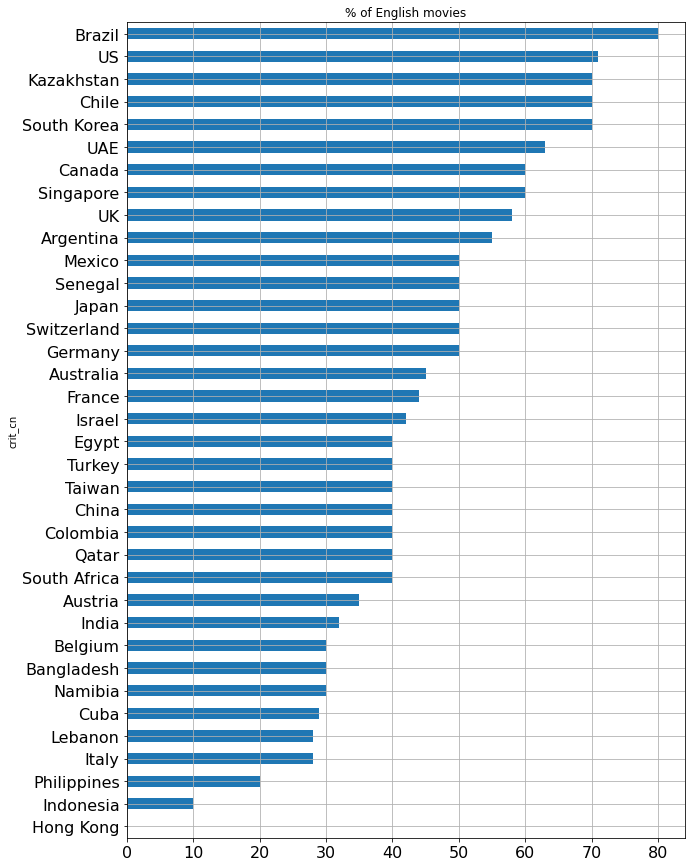

In [244]:
eng_pct_r.English.sort_values(na_position='first').plot(kind ='barh', fontsize=16, figsize=(10, 15), title = "% of English movies",grid=True,)


In [ ]:
# Couclusion: More than half of the movies selected by these critcs are in English
# "Americans do not watch subtitled movies" stereotype is not true
# The critics do not always tend to select movies in their mother toungue